<a href="https://colab.research.google.com/github/sage-27/myfrstrepo/blob/main/CropProductionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crop Production data.csv")
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [27]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

3730 Null records. Needs to be processed before proceeding to analyze the data.
Since the number of missing values is too small compared to the size of the dataset we can remove the null values.


In [104]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [29]:
df.State_Name.unique()


array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [30]:
df.State_Name.nunique()

33

There is data for crop production in 33 different states of India in the dataset including the Union Territory.

We can divide these states into different cropping zones.
Zones have their own characteristics of climate and environment making it easier to analyze the conditions required for certain crops.

This may help in determining the best crops to grow in certain regions depending on the climatic condition of the region.


In [31]:

north_zone = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_zone = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_zone = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_zone = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_zone = ['Madhya Pradesh', 'Chhattisgarh']
north_east_zone = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_zone = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

def get_zonal_names(row):
    if row['State_Name'].strip() in north_zone:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_zone:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_zone:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_zone:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_zone:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_zone:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_zone:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].value_counts()


South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

We can observe that South zone is the leading producing Zone in India.

This is can be supported with the fact that South Zone receives a good amount of sunlight throughout the year, also is closer to the water bodies making it richer in deposits and minerals necessary for crop growth.

Most crops grown in South region are dependent on amount of rainfall received.

In [32]:
df.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [33]:
df.Season.nunique()

6

In [34]:
df.Season.value_counts()

Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64

There is data of 6 different crop seasons of india in the dataset.

Kharif, Rabi and Whole Year crops are the most grown crops in India.

In [35]:
df.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [36]:
df.Crop.nunique()

124

There are 124 different crops grown in India.

We can catagorize these crops into various crop catagories.

In [37]:
crop=df['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df['cat_crop']=df['Crop'].apply(cat_crop)


In [38]:
df['cat_crop'].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

We have divided the crops into above catagories.
We can observe that Cereals & Pulses
are the important crops grown in India.

#**Pictorial representation of the dataset.**

## Zone Wise Production Trends.


Text(0.5, 1.0, 'Zone-Wise Production: Total')

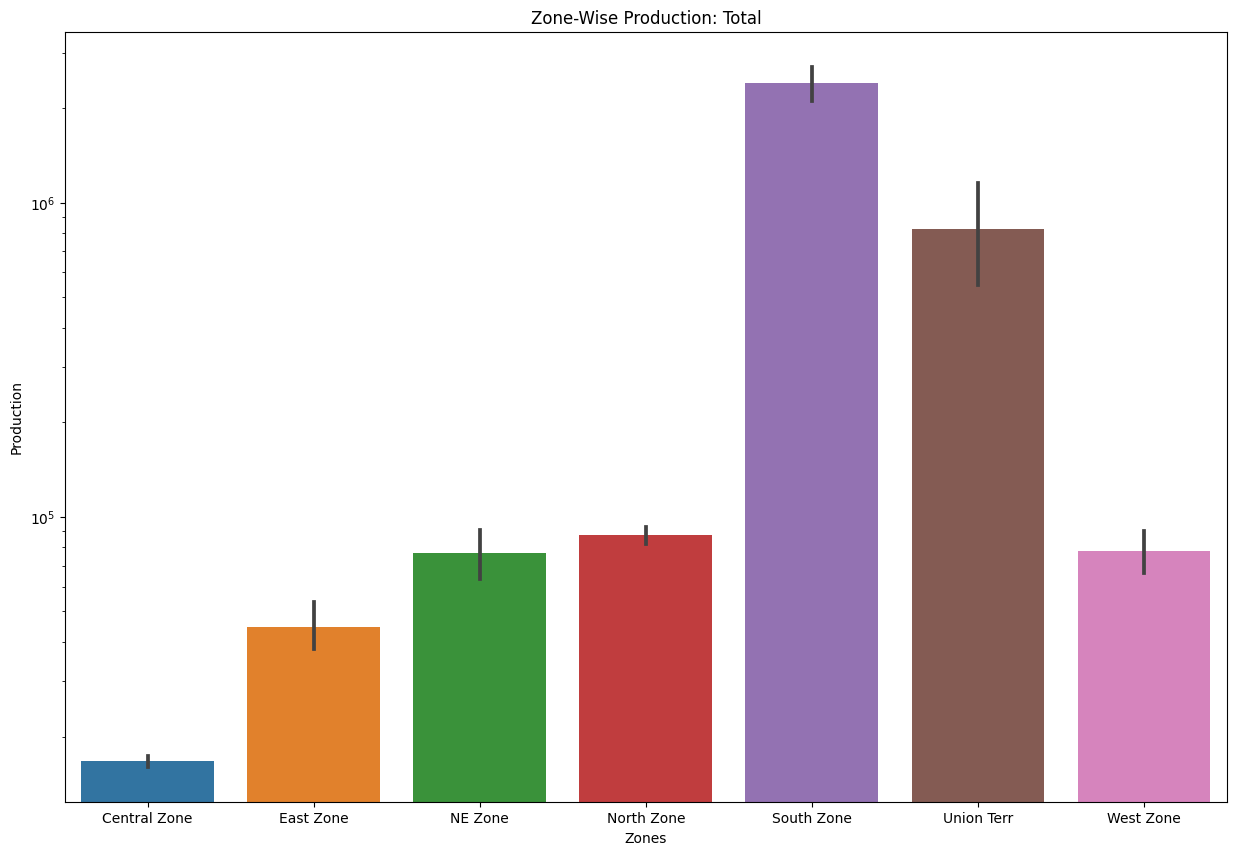

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sb.barplot(x = df.Zones.sort_values(ascending=True), y = df.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

South Zone is the TOP CROP PRODUCING ZONE.


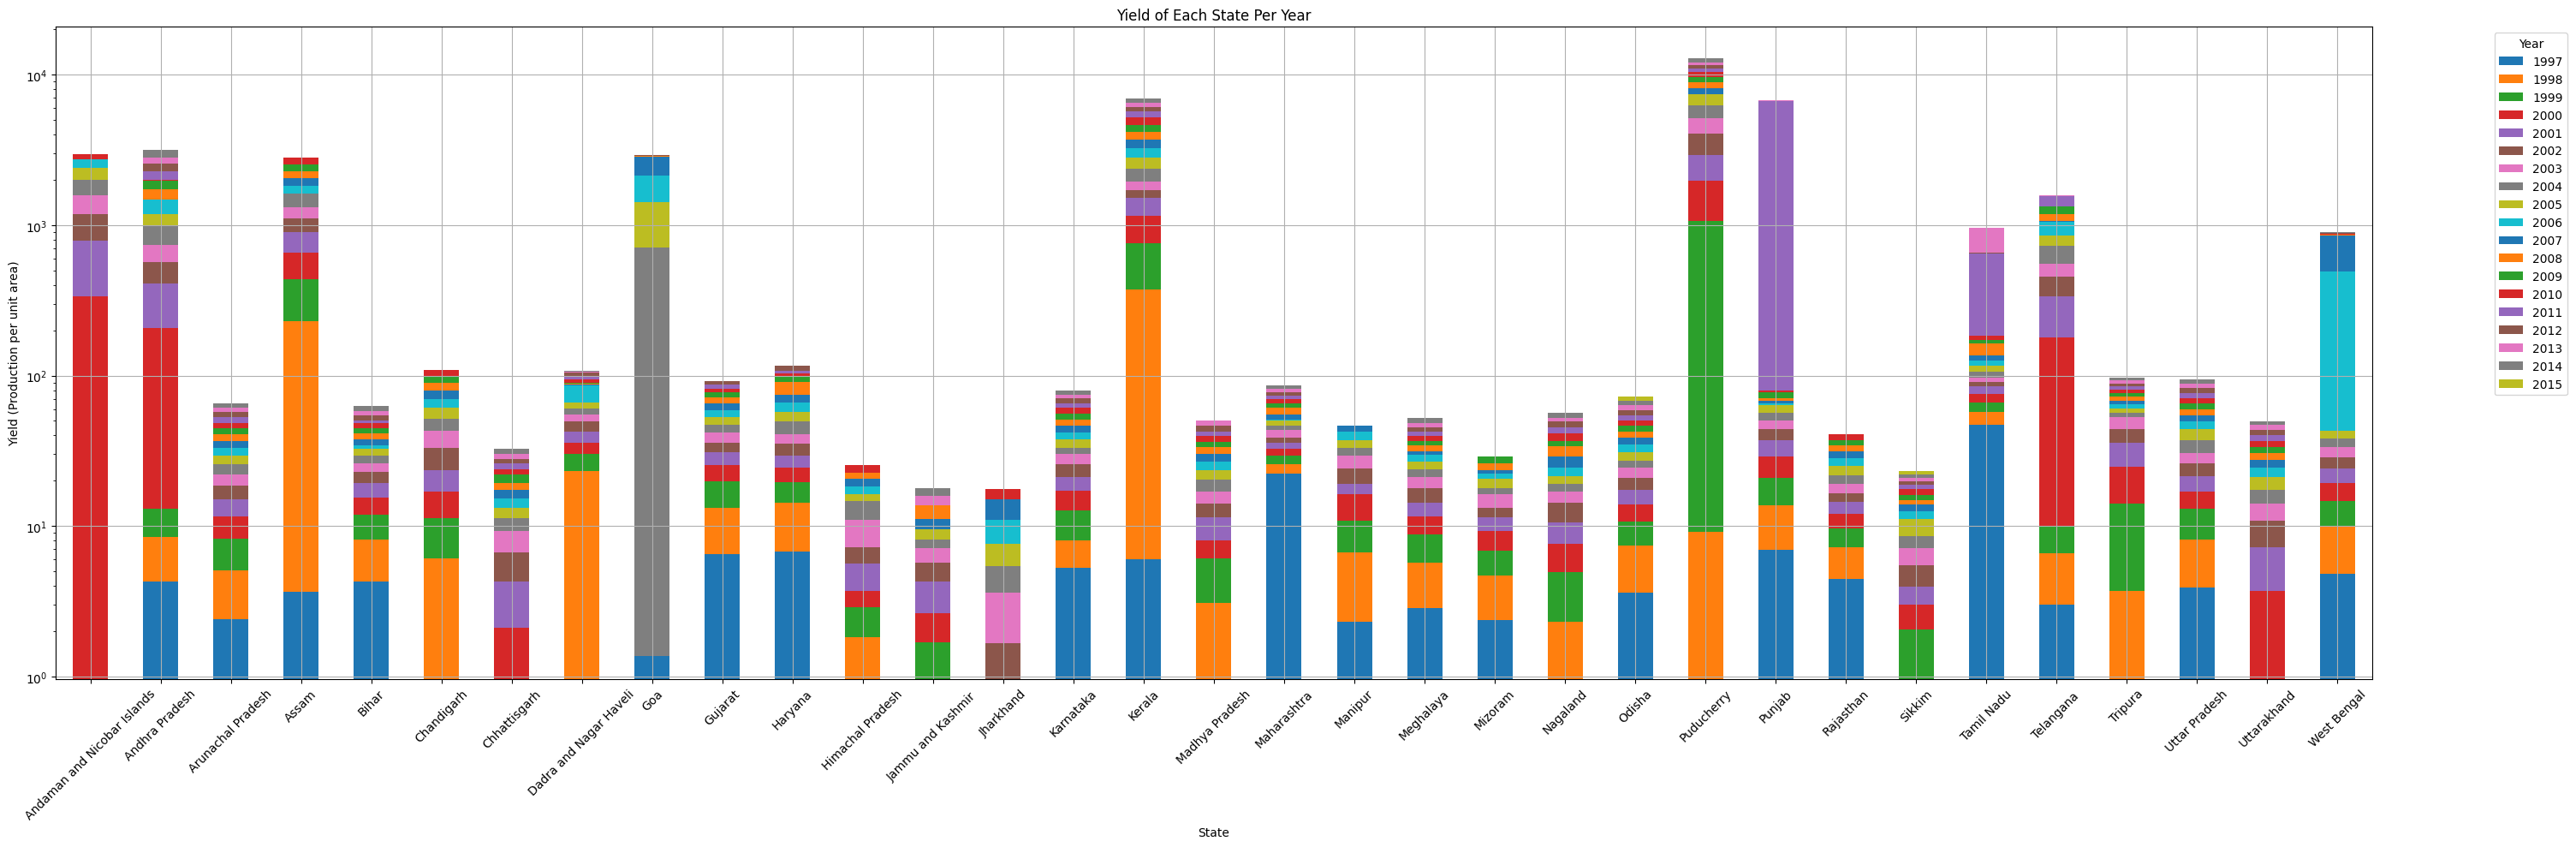

In [119]:
df['Yield'] = df['Production'] / df['Area']

# Create a pivot table
pivot_df = df.pivot_table(values='Yield', index='State_Name', columns='Crop_Year', aggfunc='mean')
pivot_df

# Plotting - using a line plot here; you can also use a bar plot if you prefer
pivot_df.plot(kind='bar',stacked = True, figsize=(30,10))

plt.title('Yield of Each State Per Year')
plt.xlabel('State')
plt.ylabel('Yield (Production per unit area)')
plt.yscale('log')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Yield represents the use of area for production.
We can observe from above chart that Puducherry and Kerala utilize their smaller areas very efficiently as compared to states with larger areas.

Text(0.5, 1.0, 'Southern-Zone Production')

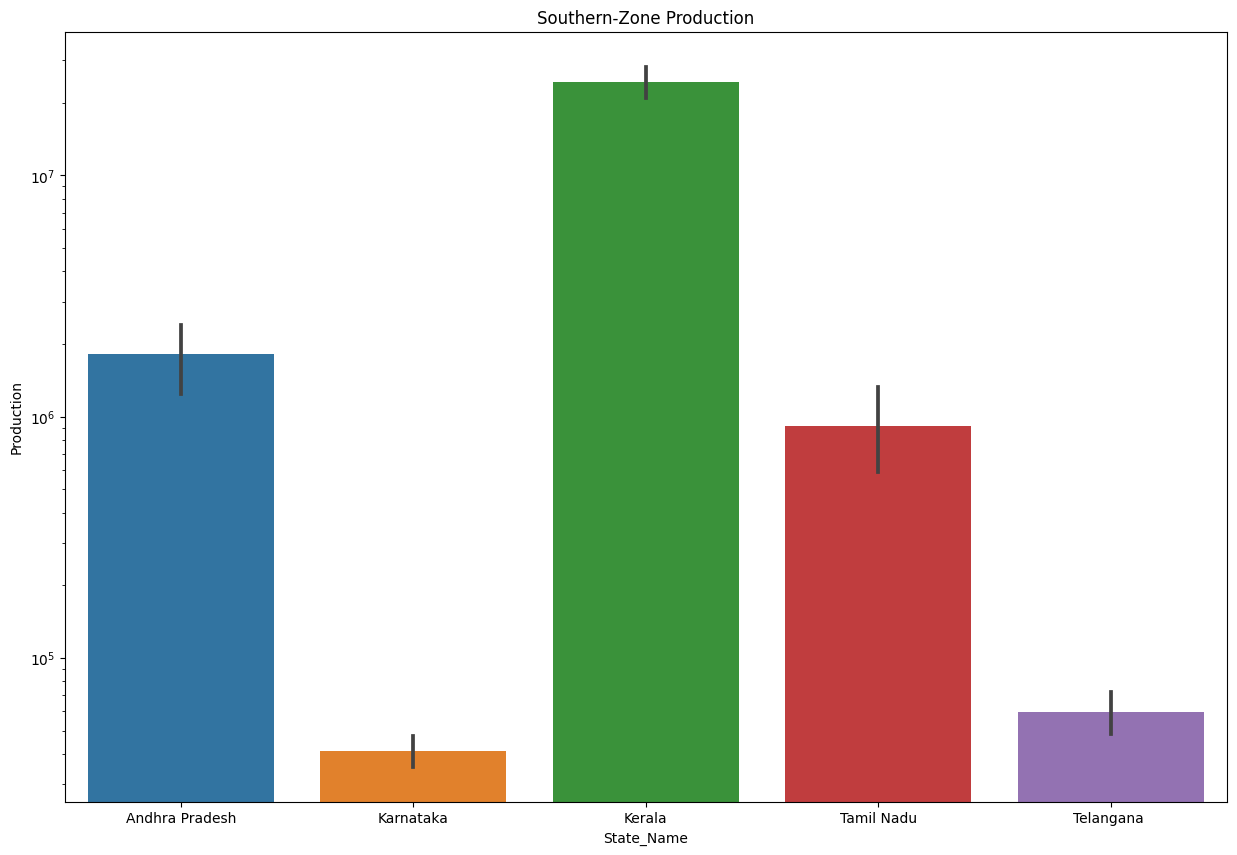

In [42]:
southzone = df[(df['Zones'] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sb.barplot(x = southzone.State_Name, y = southzone.Production)
plt.yscale('log')
plt.title('Southern-Zone Production')

Kerala is the Top Crop Producing state in South Zone.



Text(0.5, 1.0, 'Kerala Production Trends through years.')

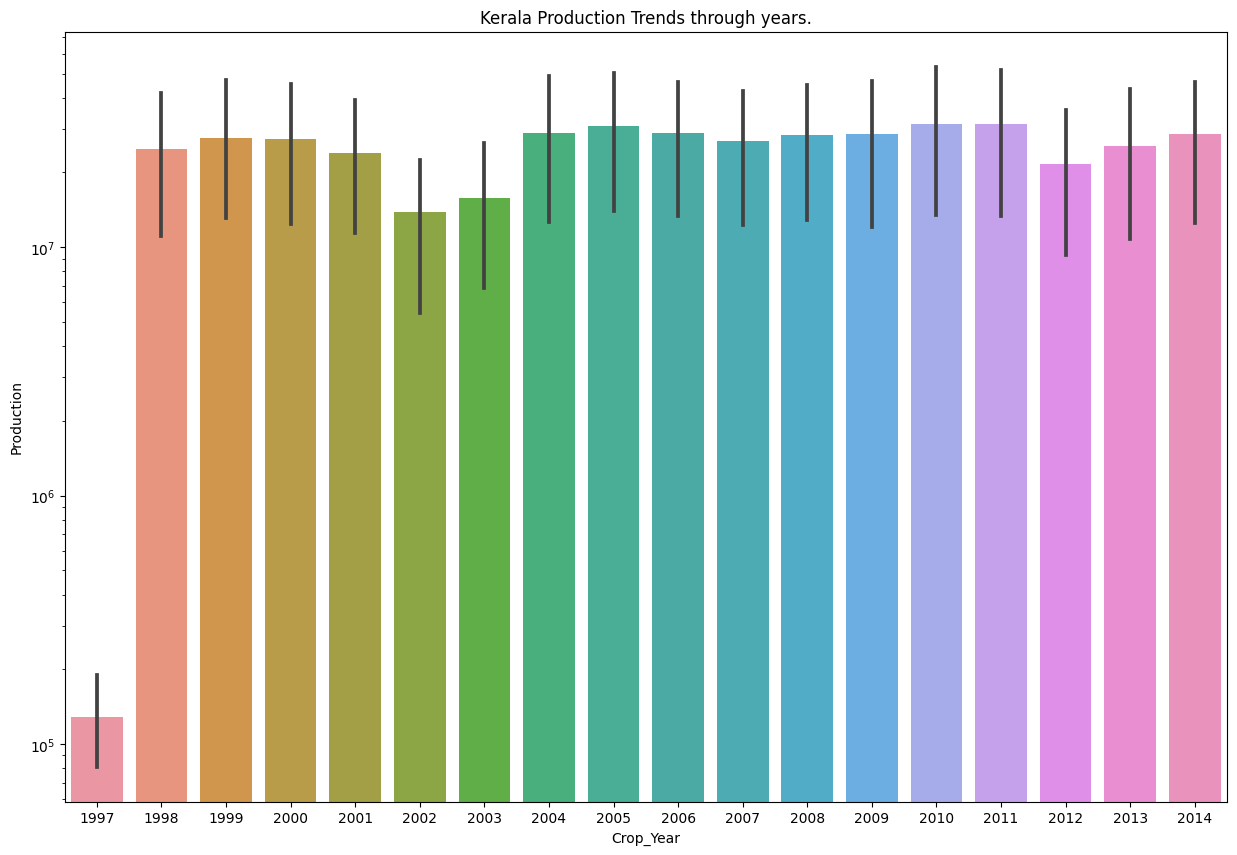

In [43]:
keralaProduction = df[(df['State_Name'] == 'Kerala')]
fig, ax = plt.subplots(figsize=(15,10))
sb.barplot(x = keralaProduction.Crop_Year, y = keralaProduction.Production)
plt.yscale('log')
plt.title('Kerala Production Trends through years.')

Kerala has been producing at the top since 1998.












## Cropwise Production Trends

Text(0.5, 1.0, 'Overall Crops vs Production')

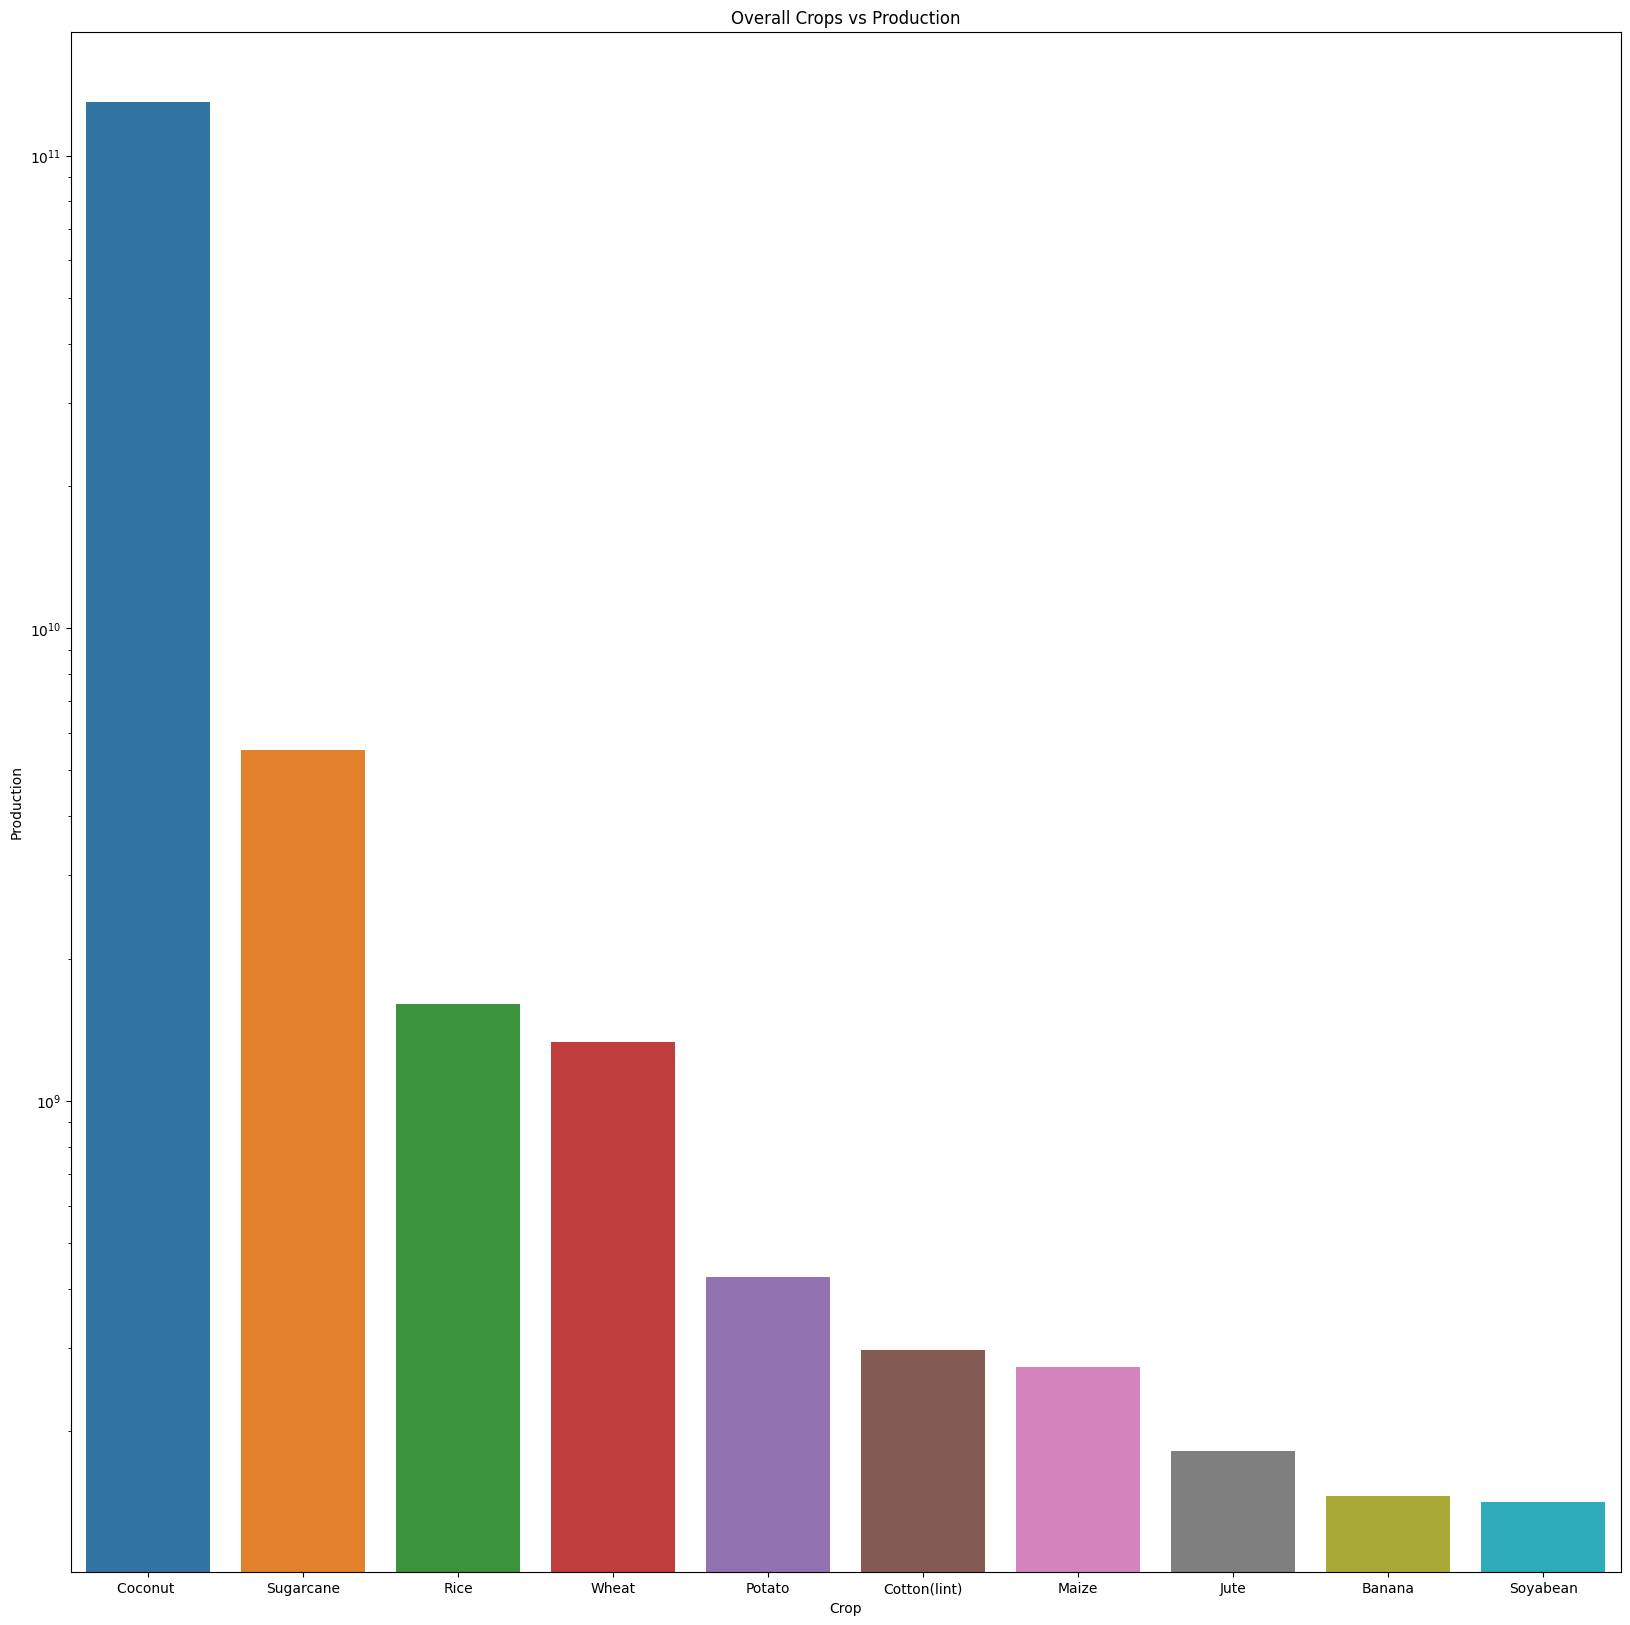

In [62]:
cropwise = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by = 'Production',ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,20))
sb.barplot(x = cropwise.Crop, y = cropwise.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')


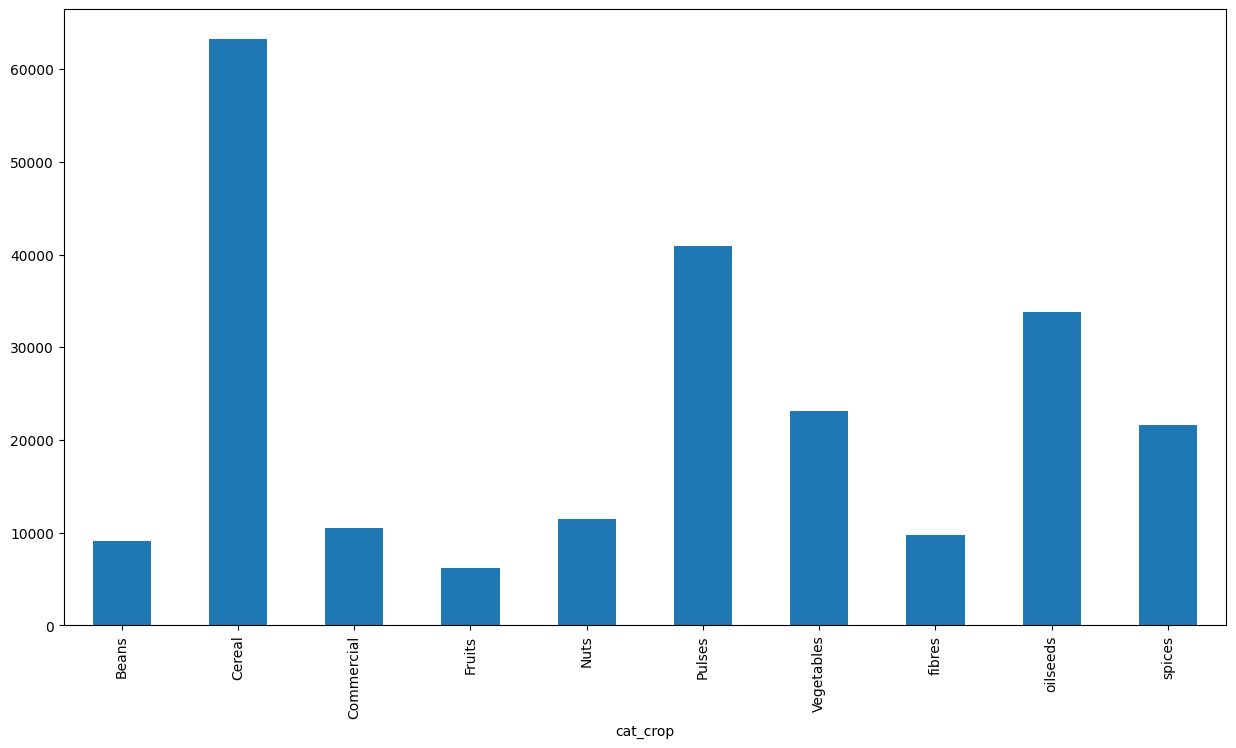

In [63]:

cropcat = df.groupby("cat_crop")["Production"].agg("count")
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
cropcat.plot.bar()
plt.show()

Text(0.5, 1.0, 'Seasonal Crops vs Production')

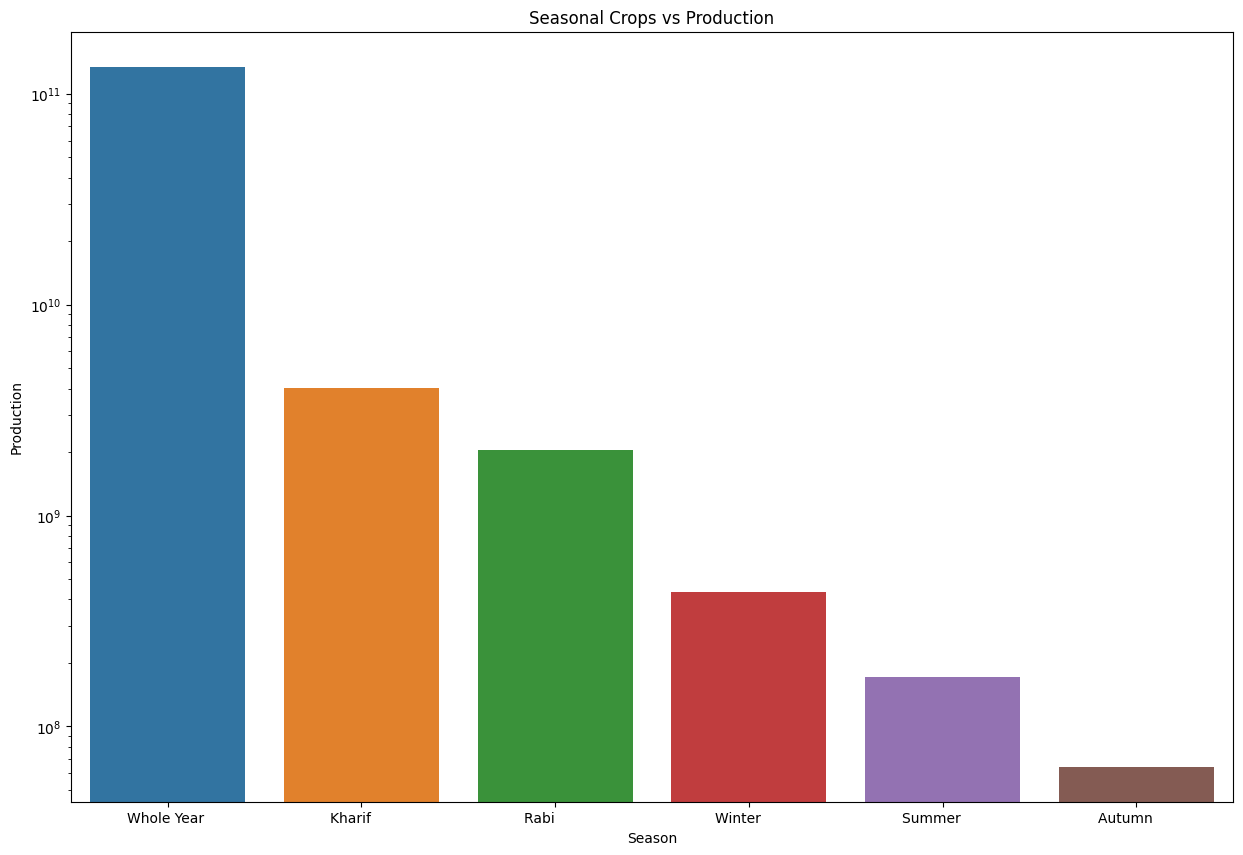

In [93]:
seasonwise = df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15,10))
sb.barplot(x = seasonwise.Season, y = seasonwise.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

Text(0.5, 1.0, 'Cereal Production')

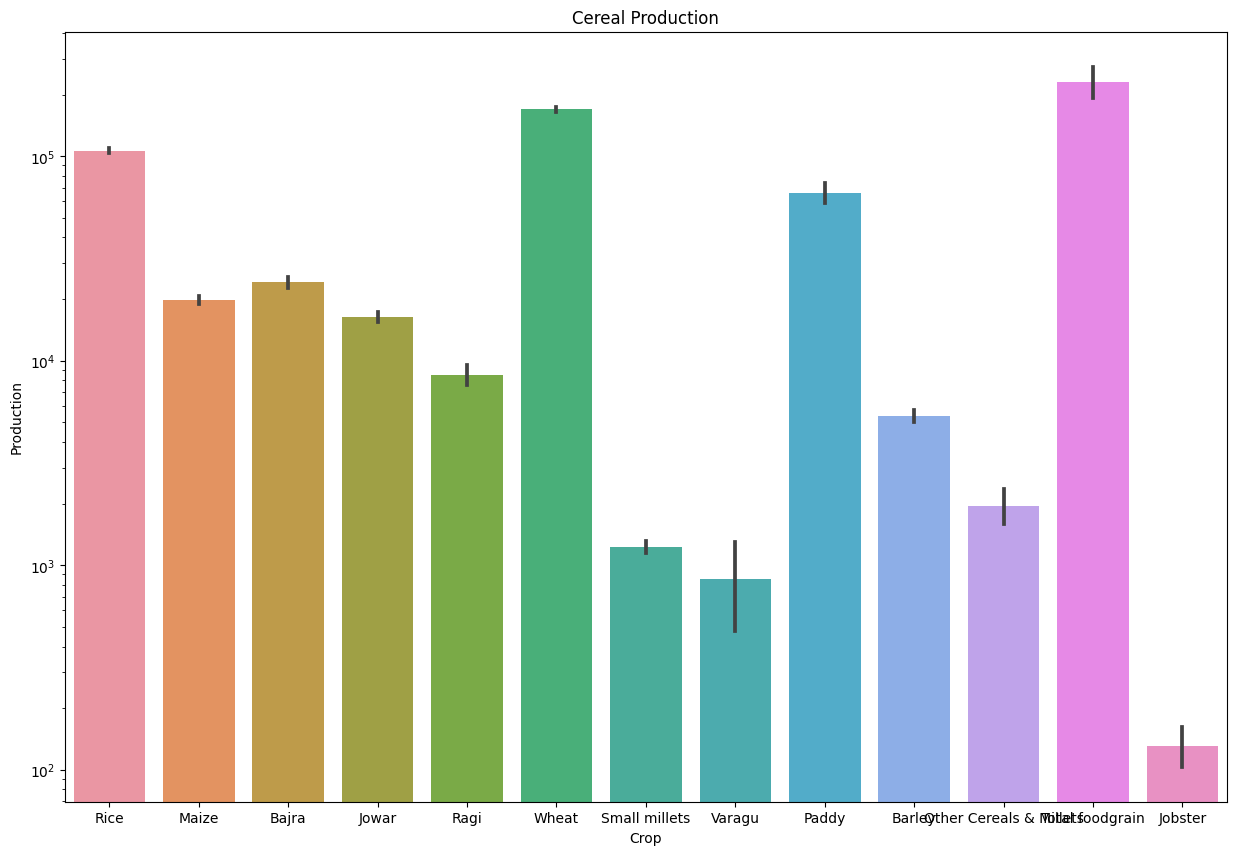

In [92]:
cer_df = df[df['cat_crop'] == "Cereal"]
fig, ax = plt.subplots(figsize=(15,10))
sb.barplot(x = cer_df.Crop, y = cer_df.Production)
plt.yscale('log')
plt.title('Cereal Production')

We can see that Rice and Wheat are top cereals produced in India.

Rice is a Kharif crop.

Wheat is a Rabi crop.

We can observe that Whole Year , Kharif & Rabi are top seasons to produce crops in India.

Kharif and Rabi are monsoon seasons for crops in India.

Kharif and Rabi are two major cropping seasons in the Indian subcontinent.

Kharif crops are grown during the monsoon season from
June to September.

Rabi crops are grown in winter and harvested in the spring.